**Image Metadata Extraction**

In the first step we want to extract the metadata information of an image to check agains specific image guidlines

1. image size: height, width
2. image resolution
3. image sharpness
4. colors in an image


In [ ]:
!pip install easydev             
!pip install colormap               
!pip install opencv-python          
!pip install colorgram.py            
!pip install extcolors 
!pip install matplotlib
!pip install opencv-python
!pip install azure-cognitiveservices-vision-computervision
!pip install azure-ai-textanalytics
!pip install semantic-kernel


 

In [1]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import extcolors
from colormap import rgb2hex
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

load image

In [ ]:
img_path = 'C:/Users/laetitiamaar/OneDrive - Microsoft/AI_projects-main/OttoHack_BannerCheck/data/banner1.jpeg'

In [ ]:
def get_image_size(img_path):
    img = cv2.imread(img_path)
    height,width = img.shape[:2]
    return height, width

def get_image_resolution(img_path):
    img = cv2.imread(img_path)
    height, width = img.shape[:2]
    return width*height

def get_image_sharpness(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharpness = laplacian.var()
    return sharpness

In [7]:
float(get_image_sharpness(img_path))

85.37719880164846

In [7]:
get_image_size(img_path)

(4134, 2800)

Now we want to extract the colors in the image (to check if certain colors are present in the image)
https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e/

(900, 1328)


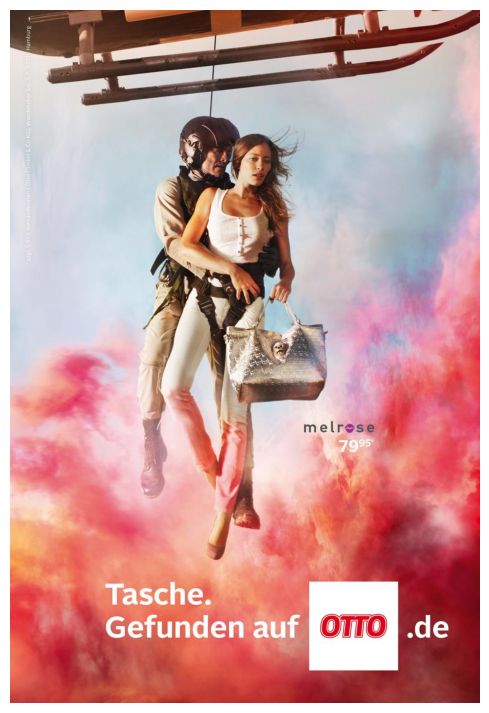

In [ ]:
#resize image

output_width = 900                   #set the output size
img = Image.open(img_path)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize))
img_resized_path = 'C:/Users/laetitiamaar/OneDrive - Microsoft/AI_projects-main/OttoHack_BannerCheck/data/banner1_resized.jpeg'
filename = os.path.splitext(os.path.basename(path))[0]
img.save(img_resized_path)
print(img.size)

plt.figure(figsize=(9, 9))
plt.imshow(img)
plt.axis('off')
plt.show()
    

In [ ]:
def color_extraction(img_path):
    colors_x = extcolors.extract_from_path(img_resized_path, tolerance = 12, limit = 12)
    return colors_x

([((212, 215, 230), 273114),
  ((220, 77, 71), 96484),
  ((255, 255, 255), 81319),
  ((239, 137, 112), 77444),
  ((227, 210, 202), 76308),
  ((246, 179, 170), 65342),
  ((236, 121, 126), 50613),
  ((132, 12, 22), 42656),
  ((85, 52, 37), 36719),
  ((54, 25, 17), 35925),
  ((170, 187, 197), 34661),
  ((247, 195, 207), 28223)],
 1195200)

In [23]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#D4D7E6,273114
1,#DC4D47,96484
2,#FFFFFF,81319
3,#EF8970,77444
4,#E3D2CA,76308
5,#F6B3AA,65342
6,#EC797E,50613
7,#840C16,42656
8,#553425,36719
9,#361911,35925


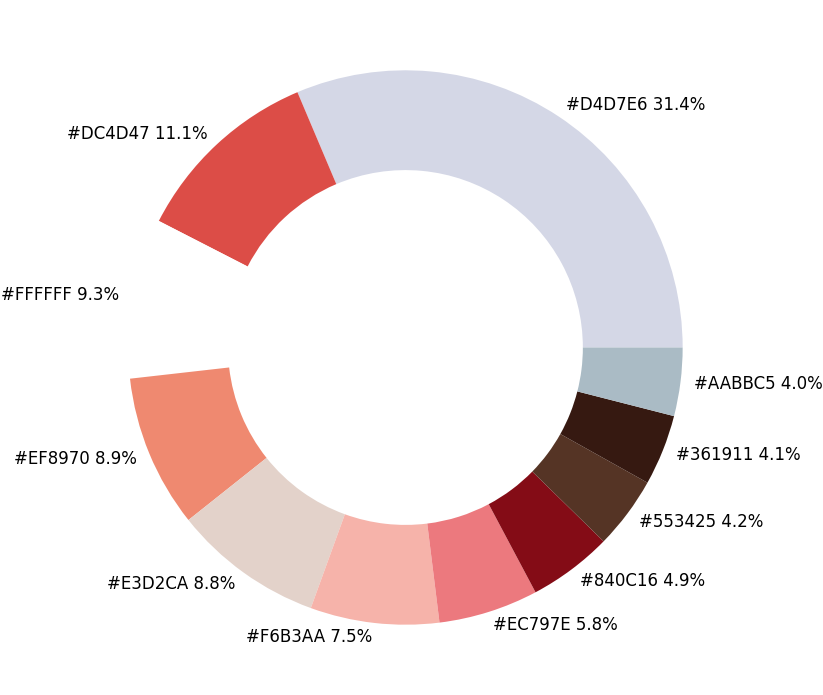

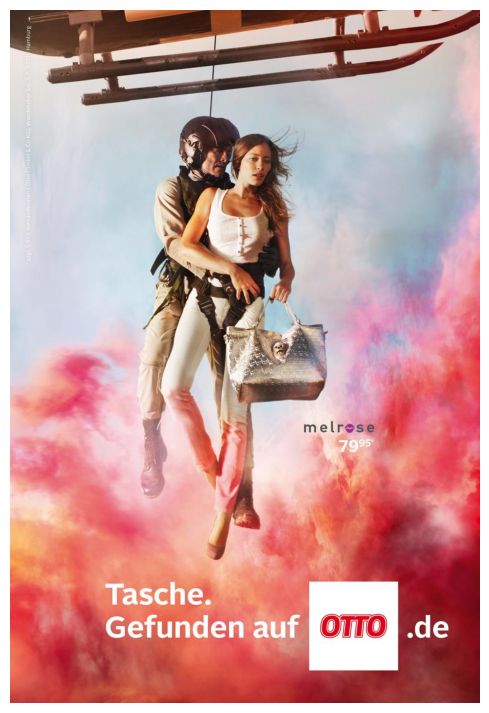

In [25]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()


plt.figure(figsize=(9, 9))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
import time

# Azure Computer Vision credentials
endpoint = "https://laetitiacv.cognitiveservices.azure.com/"
key = "8IcBmIB9O3yWfmR19GfCoJVAgzWDw6FOHoDFlxK8jxhmhJItSbzxJQQJ99BFACfhMk5XJ3w3AAAFACOGjadb"

# Create client
client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(key))

image_path = "C:/Users/laetitiamaar/OneDrive - Microsoft/AI_projects-main/OttoHack_BannerCheck/data/resized/banner1_resized.jpeg"

with open(image_path, "rb") as image_stream:
    read_response = client.read_in_stream(image_stream, raw=True)

operation_location = read_response.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

while True:
    result = client.get_read_result(operation_id)
    if result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

if result.status == 'succeeded':
    for page in result.analyze_result.read_results:
        for line in page.lines:
            print(line.text)


"zzgl. 5,95 € Versandkosten | Otto (GmbH & Co KG), Wandsbeker Str. 3-7, 22172 Hamburg
melrose
7995*
Tasche.
Gefunden auf
OTTO
.de


In [2]:
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.core.credentials import AzureKeyCredential

endpoint = "https://laetitiadocintel.cognitiveservices.azure.com/"
key = "1zyBNt6tb2s6gKZEfYPmaaH2NHVuXUMj1Y3mATAeuDdiRXfQDj4lJQQJ99BFACfhMk5XJ3w3AAALACOGdVJc"

client = DocumentIntelligenceClient(endpoint, AzureKeyCredential(key))
img_path = "C:/Users/laetitiamaar/OneDrive - Microsoft/AI_projects-main/OttoHack_BannerCheck/data/resized/banner1_resized.jpeg"
# Read image and send for analysis
with open(img_path, "rb") as f:
    poller = client.begin_analyze_document("prebuilt-read", body=f)
    result = poller.result()

# Extract text lines
lines = []
for page in result.pages:
    for line in page.lines:
        print(line.content)



*zzgl. 5,95 € Versandkosten | Otto (GmbH & Co. KG), Wandsbeker Str. 3-7, 22172 Hamburg
melrose
7995
Tasche.
Gefunden auf
OTTO
.de
